In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import pycountry
from adjustText import adjust_text
from sklearn.cluster import KMeans

In [29]:
embedding = np.array(pd.read_csv('emb_test.tsv', sep='\t', header=None))
meta_info = np.array(pd.read_csv('emb_meta_test.tsv', sep='\t', header=None))
meta_info = [pycountry.languages.get(alpha_2=x[0]).name for x in meta_info]

embedding

array([[ 21.369883 ,  40.80001  ,  10.176404 , ...,  -3.3705697,
        -14.820683 ,  36.20132  ],
       [ 23.330265 ,  32.35444  , -17.917074 , ..., -11.930519 ,
         13.560289 ,  35.916492 ],
       [ 29.677275 ,  30.306986 ,  -0.8308709, ..., -11.866453 ,
        -10.539039 ,  27.04966  ],
       ...,
       [ 30.567753 ,  27.409464 ,   5.6123285, ...,  -6.0426774,
        -14.188079 ,  34.401558 ],
       [ 14.002848 ,  34.074883 ,   7.7611403, ...,   1.033773 ,
         13.564686 ,  54.70383  ],
       [ 36.6074   ,  37.818    ,   7.0449405, ...,  -7.3259726,
        -16.090075 ,  47.034378 ]])

In [30]:
pd.Series(meta_info).value_counts()

French                  100
Persian                 100
Swedish                 100
Armenian                100
Arabic                  100
Dutch                   100
Danish                   99
Latvian                  95
Finnish                  93
Estonian                 85
German                   82
English                  80
Turkish                  72
Spanish                  55
Urdu                     52
Italian                  49
Japanese                 42
Azerbaijani              34
Russian                  29
Icelandic                26
Norwegian                24
Chinese                  23
Ukrainian                17
Lithuanian               13
Slovenian                 9
Serbian                   7
Modern Greek (1453-)      5
Hungarian                 4
Croatian                  4
Macedonian                4
Norwegian Nynorsk         3
Polish                    2
Portuguese                1
dtype: int64

In [18]:
def plot_embedding(reducer):
    data = pd.DataFrame(reducer.fit_transform(embedding))
    kmeans = KMeans(n_clusters=len(np.unique(meta_info)), random_state=0).fit(data)

    data.columns = ['x', 'y']
    data['language'] = meta_info
    data['kmean_cluster'] = kmeans.labels_
    
    fig, ax = plt.subplots(1, figsize=(15,10))
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)

    g = sn.scatterplot(data=data, x="x", y="y", hue='language', ax=ax)
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, 
                   right=False, left=False, labelleft=False)
    
    ax.set_xlabel("")
    ax.set_ylabel("")

    # for each language
    texts = []
    for language in np.unique(meta_info):
        # find cluster with most occurrences of this language
        cluster_id = data[data['language'] == language]['kmean_cluster'].value_counts().index[0]
        cluster = kmeans.cluster_centers_[cluster_id]

        # annotate
        texts.append(plt.text(x=cluster[0], y=cluster[1], s=language, bbox=props))

    adjust_text(texts)

#  PCA

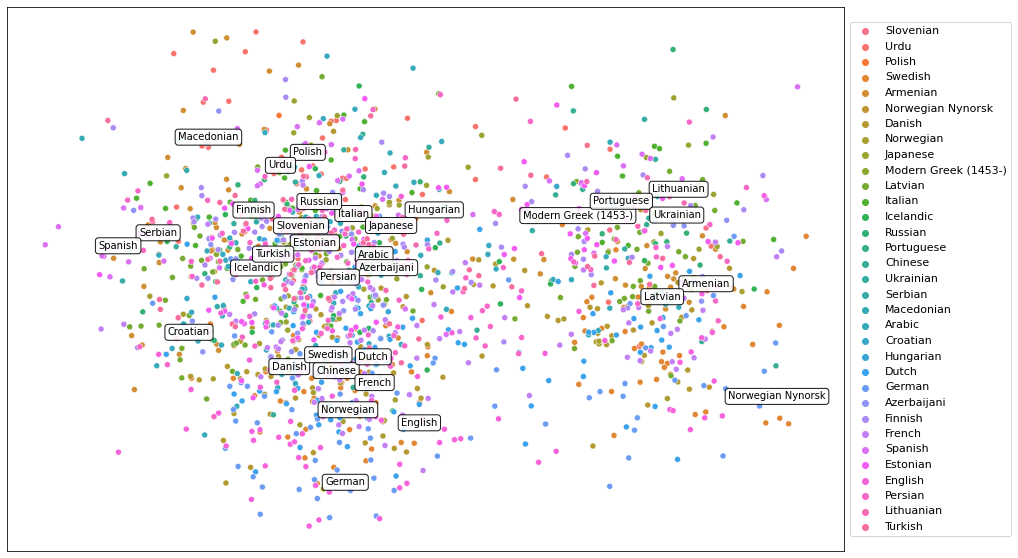

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
plot_embedding(reducer=pca)

# UMAP

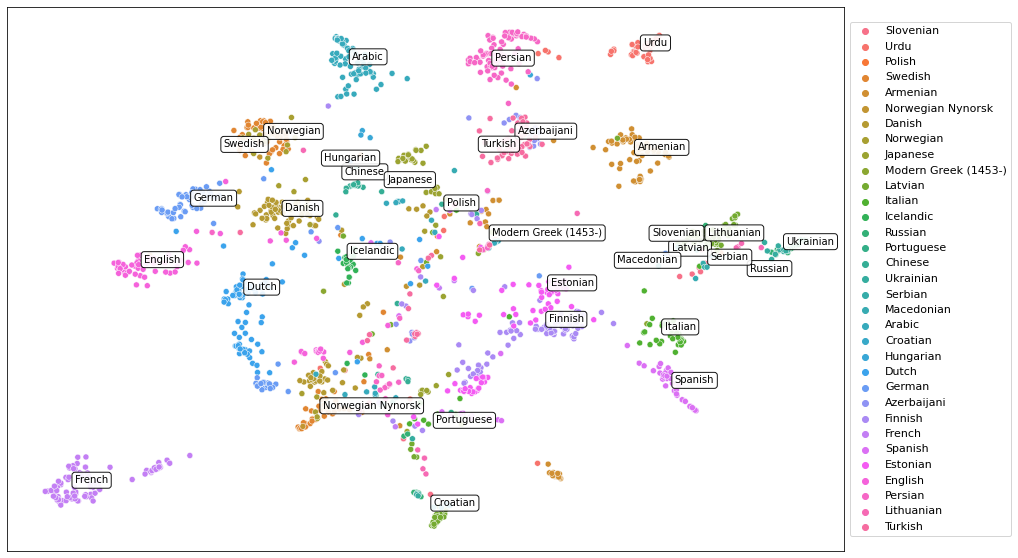

In [27]:
import umap

reducer = umap.UMAP()
plot_embedding(reducer=reducer)

# T-SNE

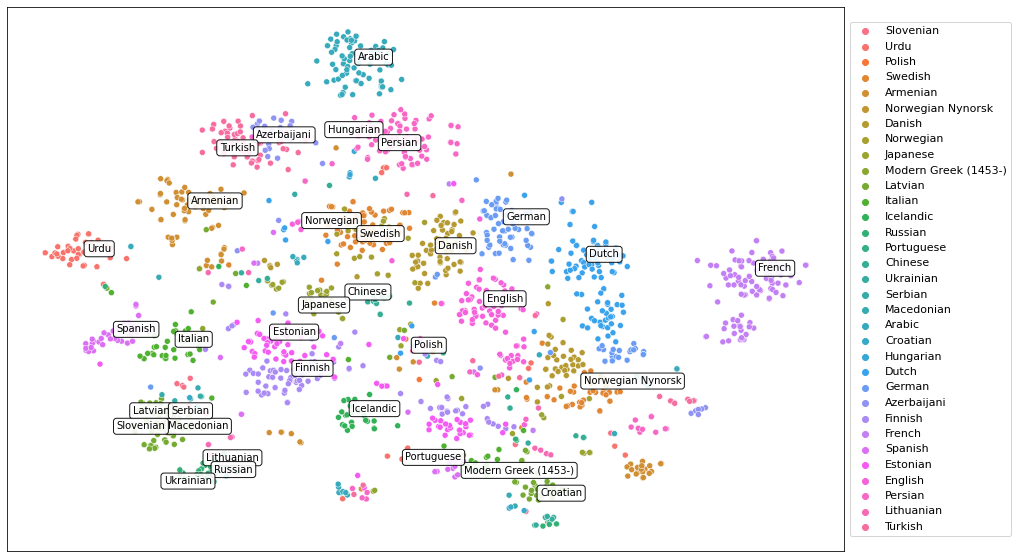

In [25]:
from sklearn.manifold import TSNE

reducer = TSNE(n_components=2, learning_rate='auto', init='random')
plot_embedding(reducer=reducer)